


## Predicting Water Pumps' Functionality in Tanzania

#### Introduction and Problem Definition

            Tanzania started their free water project for all in 1971 after they gained independence. As a socialist country, it had water extraction and distribution firmly under government control through Village Water Committee. By 1992, policy makers realized that their current water policy was not working as 50% of the rural population still had no access to water. The government started privatizing water extraction and distribution Its goal was to convert the Village Water Committee to a regulatory body than an active managing partner of water pumps. 
           With that big picture as a backdrop, my problem set comes from Data Driven Oragnization and the goal is to accurately predict which water pumps are faulty so that the maintainence can be efficent and water will be kept running in those communities. The data is curated from Ministry of Tanzania and Tafarria, a crowd driven data collection platform.        
           

#### Introduction to Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] =14


**Reading in Independent features, checking out shape, columns**

In [2]:
waterindep = pd.read_csv('waterindependent.csv', header = 0,index_col = 0)
waterindep.shape

(59400, 39)

In [3]:
waterindep.columns

Index([u'amount_tsh', u'date_recorded', u'funder', u'gps_height', u'installer',
       u'longitude', u'latitude', u'wpt_name', u'num_private', u'basin',
       u'subvillage', u'region', u'region_code', u'district_code', u'lga',
       u'ward', u'population', u'public_meeting', u'recorded_by',
       u'scheme_management', u'scheme_name', u'permit', u'construction_year',
       u'extraction_type', u'extraction_type_group', u'extraction_type_class',
       u'management', u'management_group', u'payment', u'payment_type',
       u'water_quality', u'quality_group', u'quantity', u'quantity_group',
       u'source', u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group'],
      dtype='object')

In [14]:
waterindep.groupby('region')['amount_tsh'].mean()

region
Arusha            360.923881
Dar es Salaam     236.706832
Dodoma              0.000000
Iringa           1206.347752
Kagera              0.000000
Kigoma            347.658026
Kilimanjaro       256.826821
Lindi              28.405563
Manyara           262.463677
Mara              108.880650
Mbeya               0.000000
Morogoro          210.126560
Mtwara             59.564162
Mwanza             15.490006
Pwani             656.108159
Rukwa             821.811394
Ruvuma            897.084091
Shinyanga          11.280610
Singida           451.232776
Tabora              0.000000
Tanga             286.014134
Name: amount_tsh, dtype: float64

**Reading in the Response Variable**

In [15]:
waterdep = pd.read_csv('waterdependent.csv', header = 0,index_col = 0)
waterdep.shape
waterdep.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
dtype: int64

At a glance, the goal is to accurately predict these three categorical variables, most importantly the non-functional ones as that is the purpose of the problem statement.

To better facilitate in the analysis via cross-tabulation against response etc , the two data frames are going to be joined.

In [16]:
waterjoined = waterindep.join(waterdep, how = 'left', sort = False)
waterjoined.head(2)

amount_tsh date_recorded   funder  gps_height installer  longitude  \
id                                                                          
69572        6000       3/14/11    Roman        1390     Roman  34.938093   
8776            0        3/6/13  Grumeti        1399   GRUMETI  34.698766   

       latitude  wpt_name  num_private          basin     ...       \
id                                                        ...        
69572 -9.856322      none            0     Lake Nyasa     ...        
8776  -2.147466  Zahanati            0  Lake Victoria     ...        

      water_quality quality_group      quantity  quantity_group  \
id                                                                
69572          soft          good        enough          enough   
8776           soft          good  insufficient    insufficient   

                     source           source_type  source_class  \
id                                                                
69572                spring                spring   groundwater   
8776   rainwater harvesting  rainwater harvesting       surface   

          waterpoint_type waterpoint_type_group status_group  
id                                                            
69572  communal standpipe    communal standpipe   functional  
8776   communal standpipe    communal standpipe   functional  

[2 rows x 40 columns]

In [20]:
amount_region = waterjoined.groupby('region')['amount_tsh'].mean()

In [18]:
waterjoined['NeedsRepair_Other'] = waterjoined.status_group.map({'functional': 0, 'non functional' :1, 'functional needs repair': 1 })

In [21]:
status_region = waterjoined.groupby('region')['NeedsRepair_Other'].mean()

In [28]:
amount_status_region = pd.concat([amount_region,status_region], axis =1)

In [29]:
amount_status_region.head(10)

amount_tsh  NeedsRepair_Other
region                                       
Arusha          360.923881           0.315224
Dar es Salaam   236.706832           0.427329
Dodoma            0.000000           0.541572
Iringa         1206.347752           0.217794
Kagera            0.000000           0.479192
Kigoma          347.658026           0.515980
Kilimanjaro     256.826821           0.397123
Lindi            28.405563           0.702458
Manyara         262.463677           0.376500
Mara            108.880650           0.550025

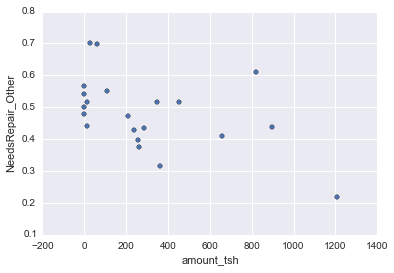

In [32]:
%matplotlib inline
amount_status_region.plot(kind='scatter', x ='amount_tsh', y='NeedsRepair_Other')

In [40]:
 waterjoined.groupby('region')['amount_tsh'].agg(['mean','std'])

mean          std
region                                 
Arusha          360.923881  2274.915820
Dar es Salaam   236.706832  2612.250698
Dodoma            0.000000     0.000000
Iringa         1206.347752  4782.562343
Kagera            0.000000     0.000000
Kigoma          347.658026   851.803578
Kilimanjaro     256.826821  2184.879625
Lindi            28.405563   171.470406
Manyara         262.463677  1675.603743
Mara            108.880650  1422.520225
Mbeya             0.000000     0.000000
Morogoro        210.126560   460.435449
Mtwara           59.564162   399.002941
Mwanza           15.490006   247.423489
Pwani           656.108159  7338.366671
Rukwa           821.811394  2904.344383
Ruvuma          897.084091  2788.043739
Shinyanga        11.280610   708.964882
Singida         451.232776  7720.844020
Tabora            0.000000     0.000000
Tanga           286.014134  4159.589957

In [43]:
clear

In [36]:
waterjoined[waterjoined.region == 'Tanga']['amount_tsh'].value_counts()

0         1661
20         140
50         127
1000       126
30         111
200        103
500         55
100         49
40          35
2500        30
4000        20
1200        17
10          17
300         11
1500        10
7            5
3000         5
2000         5
25           5
1            3
8000         3
40000        2
15           1
700          1
10000        1
1300         1
400          1
150          1
200000       1
dtype: int64

In [37]:
waterjoined[waterjoined.region == 'Tanga']['amount_tsh'].std()

4159.589956597605

In [38]:
waterjoined[waterjoined.region == 'Tanga']['amount_tsh'].mean()

286.01413427561835

#### Data Cleaning


In [27]:
waterjoined.longitude.head(1)

id
69572    34.938093
Name: longitude, dtype: float64

Let's first check for the nulls.

In [79]:
waterjoined.isnull().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

With a total of 59,400 rows, scheme_name column in particular stood out as having too many NAs. So, let's check out what its composed of.

In [80]:
waterjoined.scheme_name.value_counts().head(10)

K                              682
None                           644
Borehole                       546
Chalinze wate                  405
M                              400
DANIDA                         379
Government                     320
Ngana water supplied scheme    270
wanging'ombe water supply s    261
wanging'ombe supply scheme     234
dtype: int64

In [81]:
waterjoined.scheme_name.value_counts().size

2696

Referencing the given data dictionary and the observations above, it looks like Scheme_Name refers to the given name to the water points which is too granular for predictive purposes. Furthermore, given the size 2696 (non-NA) types and the NAs in the thousands, it would be a useless feature, so, that feature would be dropped. As for the other NAs, they are currently significantly lower and can be assessed later when the feature comes into play in data exploration.

In [82]:
waterjoined.drop('scheme_name', axis=1, inplace = True)

From the problem description, some features such as waterpoint_type_group, waterpoint_type, source_type,source, management, management_group etc appears to have the same description. A subcategorical count of those features could help determine possible similarities.

In [83]:
waterjoined.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
dtype: int64

In [84]:
waterjoined.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
dtype: int64

In [85]:
waterjoined.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
dtype: int64

In [86]:
waterjoined.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
dtype: int64

It looks like these features are more or less similar so, they would either be dropped or only one feature would be once. Please refer to the Appendix Section for more feature comparisons.

####Data Exploration Begins

Having come from a developing country myself, I am going to start by examining the breakdown portions of waterpoints by management type. Developing countrise have reputation for corrupt officers in government and inefficient private firms colluding with corrupt officers through rent seeking.

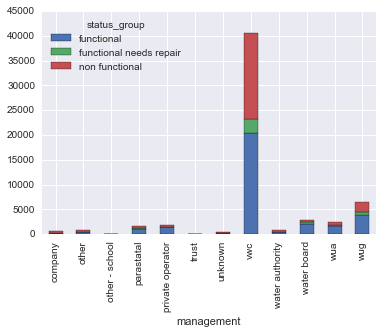

In [87]:
%matplotlib inline
uwmgmt = waterjoined.groupby(['management','status_group'])['management'].count().unstack('status_group')
uwmgmt.plot(kind='bar',stacked = True)

The bar graph is a volume graph and it looks like VWC (Village Water Committee) is still largely dominating the waterpoint management groups. An examination of its rate on each of the functional group should tell us whether it holds up to other management groups.

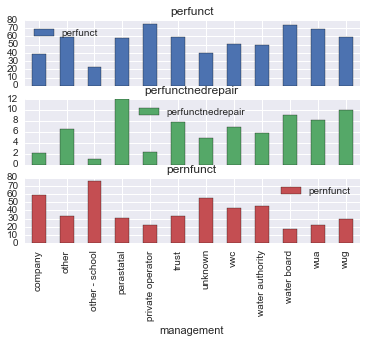

In [88]:
uwmgmt['sum'] = uwmgmt.sum(axis = 1)
uwmgmt['perfunct'] = (uwmgmt['functional']/uwmgmt['sum'])*100
uwmgmt['perfunctnedrepair'] = (uwmgmt['functional needs repair']/uwmgmt['sum']) *100
uwmgmt['pernfunct'] = (uwmgmt['non functional']/uwmgmt['sum'])*100
wmgmt = uwmgmt.loc[:,'perfunct':'pernfunct'].plot(kind='bar',stacked = False, subplots = True)

Eyeballing this, the distribution is more prominent (how do I measure this quantitatively?) different across in the Functional but needs repair category (the green) compared to the other two. From an operational standpoint, it makes more sense to pinpoint potential points of breakdown. Therefore, moving onwards, the focus would be on the functioanl needs repair category as a True Positive we want to predict while the other two would be True Negatives we want to maximize. 

Let's see if we can find more distinct distributions across region. This feature pick is based on the assumption that some regions would be more prosperous than the other having more resources to get the right equipment, fix and maintain well.

In [89]:
waterpointregionstatus = pd.crosstab(waterjoined.region, waterjoined.status_group).apply(lambda r: (r/r.sum()) * 100, axis =1)
#waterpointregionstatusplot = waterpointregionstatus.loc[:,'perfunct':'pernfunct'].plot(kind ='bar', stacked = False, subplots = True, sharex = True)

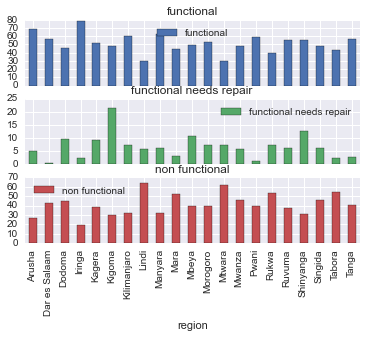

In [90]:
waterpointregionstatusplot = waterpointregionstatus.loc[:,'functional':'non functional'].plot(kind ='bar', stacked = False, subplots = True, sharex = True)

From a cursory look, the functional needs repair appears to be more volatile the other two. Let's check yet another feature before a first pass model. Another feature to test is waterpoint_types. Waterpoint_types refer to the type of waterpoints in use such as standpipe, 

In [91]:
waterpointtype = pd.crosstab(waterjoined.waterpoint_type, waterjoined.status_group).apply(lambda r: (r/r.sum()) * 100, axis =1)

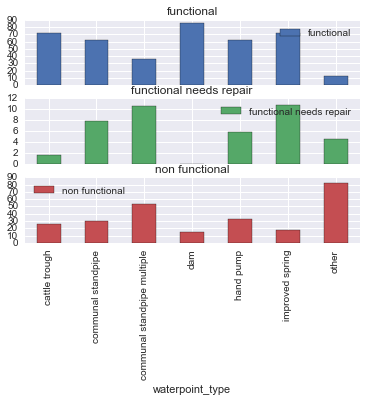

In [163]:
waterpointtypeplot = waterpointtype.loc[:, 'functional':'nonfunctional'].plot(kind='bar', stacked = False, subplots = True)

The functional needs repair appears to look like a bimodal distribution and compared to the other two above, it doesn't look that significant. Nonetheless, a further test is needed to determine it. For now, these three features would suffice for initial modeling.

####Feature Engineering

The age of these water pumps can play a role in determining whether it needs repair, has broken down or is still functioning. For that we have to create a new feature since the correct age when the status of water pump can only be determined by looking at the year the data was recorded minus the year it was constructed. 

In [154]:
waterjoined.construction_year.isnull().sum()

0

In [159]:
waterjoined.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
dtype: int64

#### Initial Modeling

First, let's change the three category problem into a two category problem by mapping the same value for functional and non-functional response categories.

In [93]:
waterjoined['NeedsRepair_Other'] = waterjoined.status_group.map({'functional': 0, 'non functional' :0, 'functional needs repair': 1 })

Let's get the dummies for feature variables

In [94]:
management_dummies = pd.get_dummies(waterjoined.management, prefix = 'Management')
region_dummies= pd.get_dummies(waterjoined.region, prefix = 'Region')
waterpoint_dummies = pd.get_dummies(waterjoined.waterpoint_type, prefix = 'WaterPoint')

In [95]:
WaterX = pd.concat([management_dummies, region_dummies, waterpoint_dummies], axis = 1)

Getting the X and the y

In [96]:
X = WaterX
y = waterjoined['NeedsRepair_Other']

Importing and Running the Logistic Regression

In [99]:
waterjoined.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
dtype: int64

In [100]:
print 32259 + 22824

55083


In [101]:
y.value_counts()

0    55083
1     4317
dtype: int64

It looks like the mapping has worked perfectly.

In [102]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [103]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train,y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

Making Predictions for the test

In [104]:
y_pred_class = logreg.predict(X_test)

We will test across the classification accuracy metrics

In [105]:
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.928148148148


92.814 % accuracy surprises me. Therefore, let's check the class balance ratio.


In [129]:
y.value_counts()
classratio = float(55083/4317)
print classratio

12.0


Testing the length of y_test and y_pred_class

In [106]:
y_test.value_counts()

0    13783
1     1067
dtype: int64

In [113]:
len(y_pred_class)

14850

In [114]:
print 13783+1067

14850


1st Run of Confusion Matrix to check sensitivity and specificity

In [115]:
confusionmatrix = metrics.confusion_matrix(y_test,y_pred_class)

In [116]:
print confusionmatrix

[[13783     0]
 [ 1067     0]]


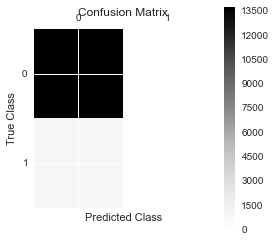

In [136]:
plt.matshow(confusionmatrix)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [118]:
TP = confusionmatrix [1][1]
TN = confusionmatrix [0][0]
FP = confusionmatrix [0][1]
FN = confusionmatrix [1][0]

In [119]:
print 'True Positives;', TP
print 'True Negatives;', TN
print 'False Positives;', FP
print 'False Negatives;', FN

True Positives; 0
True Negatives; 13783
False Positives; 0
False Negatives; 1067


Calculating Sensitivity

In [120]:
print TP/float(TP+FN)

0.0


Calculating Specificity

In [122]:
print TN/float(TN + FP)

1.0


Since the model is heavily biased towards specificity, we would like to switch the model more towards sensitivity. Let's examine the ROC and AUC curves.

ROC Curves and AUC incoming

This will print out the predicted probabilities of Functional Needs Repair

In [61]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [65]:
y_pred_prob

array([ 0.12367191,  0.02648082,  0.04024543, ...,  0.02024571,
        0.04803861,  0.00903759])

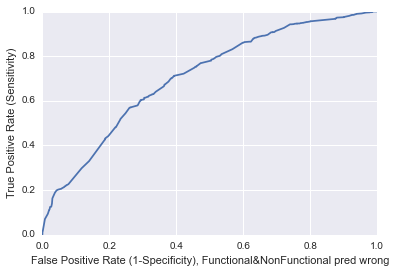

In [67]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.xlabel('False Positive Rate (1-Specificity), Functional&NonFunctional pred wrong')
plt.ylabel('True Positive Rate (Sensitivity)')

Calculating AUC

In [3]:
print metrics.roc_auc_score(y_test, y_pred_prob)

NameError: name 'metrics' is not defined

Let's have a histogram of Predicted Probabilities by actual response values to determine a more appropriate threshold

In [133]:
y_pred_prob_new = np.sqrt(y_pred_prob)

In [134]:
y_pred_prob_new[:10]

array([ 0.35167017,  0.16272928,  0.20061263,  0.35167017,  0.21107089,
        0.22184343,  0.27643323,  0.32392502,  0.22184343,  0.2797553 ])

In [2]:
y_pred_prob

NameError: name 'y_pred_prob' is not defined

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10da99550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10c51fed0>], dtype=object)

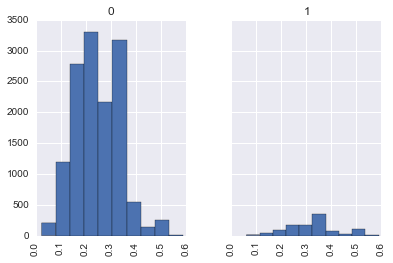

In [135]:
waterpred = pd.DataFrame({'probability': y_pred_prob_new, 'actual': y_test})
waterpred.hist(column='probability', by='actual', sharex= True, sharey=True)

### References and Notes

The Source of shorthand explanations & subsequent paper (refer to Appendix)
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0CB0QFjAAahUKEwi0qYuZ34jIAhXDVj4KHQ75DHQ&url=http%3A%2F%2Fwww.wateraid.org%2F~%2Fmedia%2FPublications%2Fprivate-operation-rural-water-supply-tanzania.pdf&usg=AFQjCNGDn5NOADhDuOOVqG9rPwkSYlJ-mg&sig2=Oumrh-BvZ82O_FqNor45Iw


Fixing water pumps budgets $1.42 Billion
Getting 65 percent of Rural Tanzanians, 90 percents of urbanites **Good for Urban vs Rural Cut**
Report on 2014, project is actually failing - Only 54 percent have waterpoint access.
**Increase in popoulation could strain the system. Check the Population feature **
**Amount of water drawing upon can also stop the water pump**
**Paying or Not Paying could play a role. If there are no funds to fix the water pump then, some pumps wouldn't be ablet o repair**
Private Companies only target the rich and not the poor or those most in need of water
**Yes, the waterpoint_type plays a role. Some systems cost more to build and will cost more to maintain**


http://www.humanosphere.org/world-politics/2014/12/tanzania-failed-fix-water-access-problem/

This one has some big picture descriptive data suitable for presentation
https://prezi.com/x4gnpindaclo/tanzania-water-crisis/


This is the typical New York Times big hand wave article. It does remind me to do some feature engineering with age of the water systems. 
http://opinionator.blogs.nytimes.com/2011/12/08/keeping-the-water-flowing-in-rural-villages/

###Appendix

Below is the image of feature descriptors from the problem set.

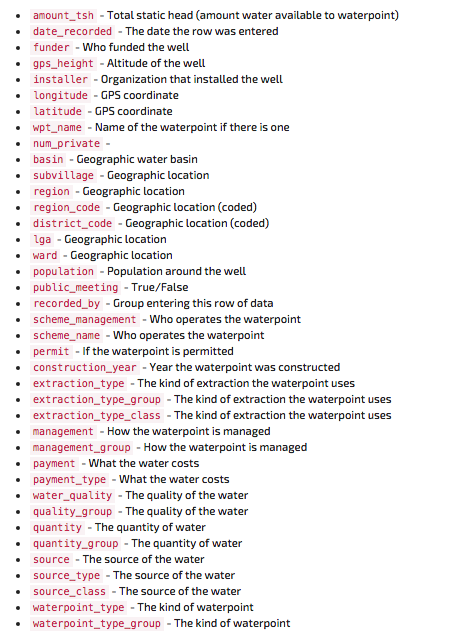

In [125]:
from IPython.display import Image
Image(filename ='/Users/zarnihtet/Desktop/waterdescriptions.png')

This is the long form for some of the Management groups I mentioned above.

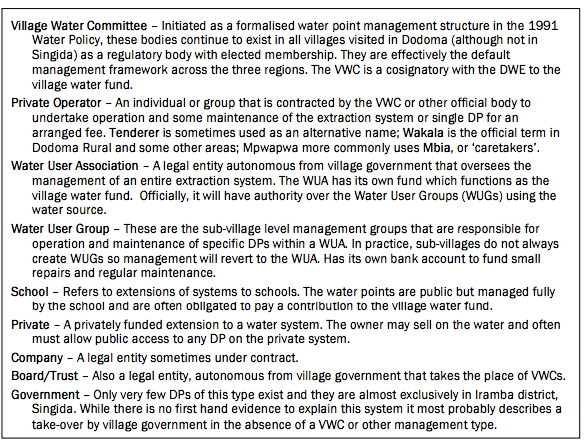

In [140]:
Image(filename='/Users/zarnihtet/Desktop/LongHandManagementGroups.png')